<a href="https://colab.research.google.com/github/Saikat-Mandal/Custom-models-ML/blob/main/Linear_regressioin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# In this notebook we will create **Linear Regression** model from scratch using python.

Linear regression formula : y = wx + b
  - y is Dependent variable
  - x is Independent variable
  - w is weight
  - b is bias

Gradient descent:

Gradient descent is an optimization algorithm used for minimizing the cost function in various machine learning algorithms. It is used for updating the parameters of the learning model.

 - w = w - α*dw
 - b = b - α*db

Here α is the learning rate which is the tuning parameter for the algoritrm that determines step size for the each iteration while moving towards the global minimum of the cost function.

we need an optimal learning rate to reach the global minimum as if learning rate is to low , it will slow down the process or if learning rate is too high it might overshoot the global minimum.

we define dw as

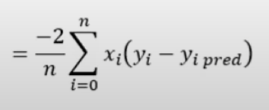

and db as

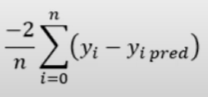

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
class LinearRegression():

  def __init__(self , learning_rate, no_of_iterations): # these are the hyperparamters
    self.learning_rate = learning_rate
    self.no_of_iterations = no_of_iterations

  def fit(self,X,y):

    # no of training examples(m) and no of features(n)
    self.m  , self.n = X.shape

    # initiating the weight and bias of the model
    self.w = np.zeros(self.n)
    self.b = 0

    self.X = X
    self.y = y

    # implementing gradient decent
    for i in range(self.no_of_iterations):
      self.update_weights()

  def update_weights(self):

    y_prediction = self.predict(self.X)

    # calculate the gradients
    dw = -(2* (self.X.T).dot(self.y - y_prediction))/self.m
    db = -(2* np.sum(self.y - y_prediction)) / self.m

    # updating the weights
    self.w -= (self.learning_rate * dw)
    self.b -= (self.learning_rate * db)

  def predict(self,X):
    return X.dot(self.w) + self.b;

In [ ]:
df = pd.read_csv('salary.csv')

In [ ]:
X = df.drop('Salary' , axis=1)
y = df['Salary']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression(learning_rate=0.02, no_of_iterations=1000)
model.fit(X_train, y_train)

In [ ]:
y_preds = model.predict(X)

In [ ]:
y_preds

,0
0,35685.936613
1,37570.765004
2,39455.593395
3,44167.664372
4,46052.492762
5,52649.392130
6,53591.806325
7,55476.634716
8,55476.634716
9,60188.705693


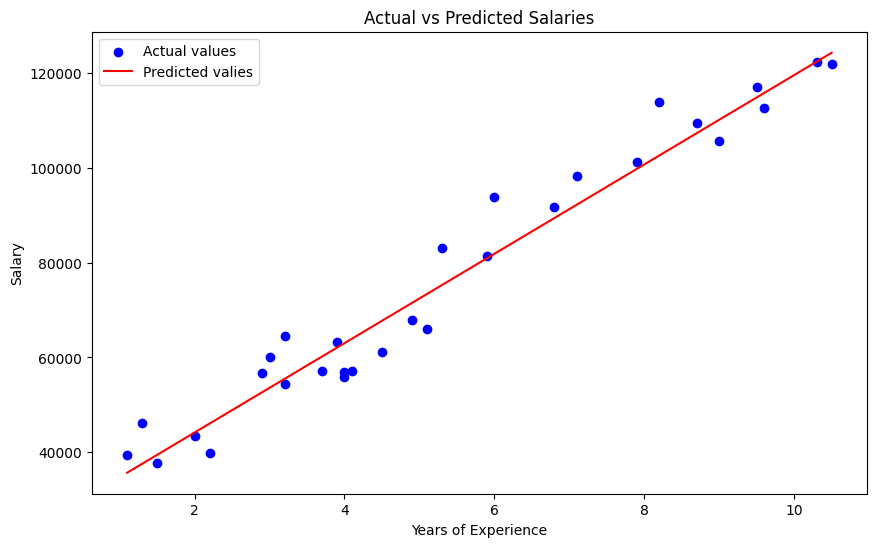

In [ ]:
fig , ax = plt.subplots(figsize=(10,6))

ax.scatter(df['YearsExperience'], df['Salary'], color='blue')
g
ax.plot(df['YearsExperience'], y_preds, color='red')

ax.set_xlabel('Years of Experience')
ax.set_ylabel('Salary')
ax.set_title('Actual vs Predicted Salaries')
ax.legend(["Actual values" , "Predicted valies"]);

